<a href="https://colab.research.google.com/github/JoaoCuri/pequenos_desafios/blob/master/Estudo_de_caso_Faculdade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

No Estudo de Caso verificamos a relação entre os segurados maiores de 40 anos e se estavam propensos a aderir à nova modalidade de seguros: “Seguro by trip”.

Avalie a relação entre o sexo dos segurados e se estão propensos a aderirem à nova modalidade de seguros “Seguro by trip”.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Dados.csv to Dados.csv


In [60]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import rcParams

from scipy.stats import spearmanr
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

%matplotlib inline
rcParams['figure.figsize'] = 5,4
sns.set_style('whitegrid')

In [4]:
df = pd.read_csv('Dados.csv',delimiter=';')
df.head()

,genero,idade,seguroVida,seguroAuto,trocariaPorByTrip
0,F,50,S,N,N
1,F,41,N,N,S
2,F,50,S,N,N
3,F,32,N,N,N
4,M,46,S,S,N


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   genero             100 non-null    object
 1   idade              100 non-null    int64 
 2   seguroVida         100 non-null    object
 3   seguroAuto         100 non-null    object
 4   trocariaPorByTrip  100 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.0+ KB


In [6]:
df.count()

genero               100
idade                100
seguroVida           100
seguroAuto           100
trocariaPorByTrip    100
dtype: int64

In [7]:
#verificando se não tem nenhum valor NaN
df['idade'].unique()

array([50, 41, 32, 46, 55, 49, 48, 54, 35, 38, 51, 31, 34, 45, 52, 47, 42,
       30, 36, 53, 33, 44, 43, 39, 40])

In [8]:
df.groupby(['idade']).idade.count()

idade
30    4
31    9
32    4
33    6
34    5
35    3
36    2
38    2
39    2
40    3
41    4
42    4
43    2
44    1
45    4
46    5
47    5
48    4
49    4
50    4
51    7
52    6
53    3
54    2
55    5
Name: idade, dtype: int64

plotando gráfico para ver o comportamento

**conferindo se o target é binário ou ordinal**

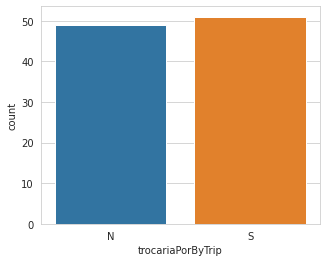

In [9]:
sns.countplot(x='trocariaPorByTrip',data= df);


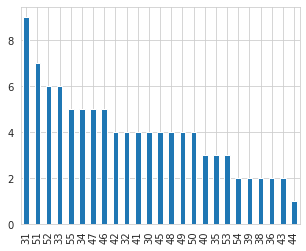

In [10]:
df['idade'].value_counts().plot(kind= 'bar');

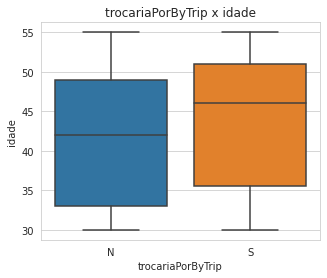

In [11]:
# tentando verificar por meio do boxplot algum outlier
sns.boxplot(x = df['trocariaPorByTrip'], y = df['idade'].astype(int), data = df);
plt.title("trocariaPorByTrip x idade");

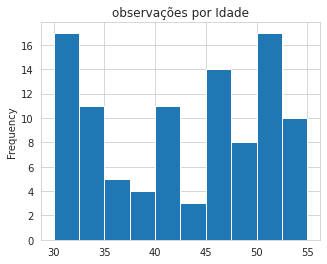

In [12]:
plt.title('observações por Idade')
df["idade"].plot(kind = 'hist');

In [13]:
Dict_genero = {
    'F' : 0,
    'M' : 1,
       }

In [14]:
df["genero"] = df["genero"].map(Dict_genero)

In [15]:
#dicionário para numerar se trocaria o não para o seguro 
Dict_troca = {
    'N' : 0,
    'S' : 1,
       }

In [16]:
df["trocariaPorByTrip"] = df["trocariaPorByTrip"].map(Dict_troca)

In [17]:
print(df.corr())

                     genero     idade  trocariaPorByTrip
genero             1.000000  0.056473          -0.180036
idade              0.056473  1.000000           0.119058
trocariaPorByTrip -0.180036  0.119058           1.000000


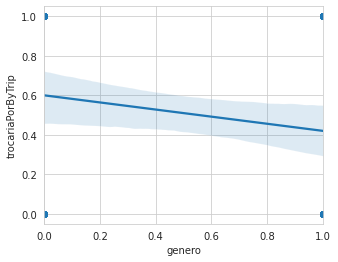

In [18]:
sns.regplot(x='genero',y = 'trocariaPorByTrip',data = df,scatter=True);


pelo comportamento podemos verificar que são categóricas

In [19]:
df.describe()

,genero,idade,trocariaPorByTrip
count,100.000000,100.000000,100.000000
mean,0.500000,42.520000,0.510000
std,0.502519,8.186562,0.502418
min,0.000000,30.000000,0.000000
25%,0.000000,34.000000,0.000000
50%,0.500000,43.500000,1.000000
75%,1.000000,50.000000,1.000000
max,1.000000,55.000000,1.000000


dividindo as idades 

In [20]:
def reducao_idade(x):
    if (x <= 40) :       
        return 1 #idade menor que 40 anos será o nosso 1 
    elif (x > 40):
        return 2 #idades maiores ou iguais a 40 será o nosso 2
    
    
df['idade'] = df['idade'].map(reducao_idade)

In [21]:
df.head()

,genero,idade,seguroVida,seguroAuto,trocariaPorByTrip
0,0,2,S,N,0
1,0,2,N,N,1
2,0,2,S,N,0
3,0,1,N,N,0
4,1,2,S,S,0


In [22]:
df_colunas = ['idade','trocariaPorByTrip']
df_dados = df[df_colunas].values

y = df['genero'].values

Checando se são independentes

In [23]:
trocariaPorByTrip = df['trocariaPorByTrip']
genero = df['genero']

spearmanr,p = spearmanr(trocariaPorByTrip,genero)
print(spearmanr)

-0.18003601080360124


Quando o coeficiente de spearmanr for bem próximo de zero podemos concluir que são indepententes.

**Deploying and evaluating your model**

In [24]:
X = scale(df_dados)

In [25]:
reg_log = LogisticRegression().fit(X,y)
print(reg_log.score(X,y))

0.59


In [26]:
y_predito = reg_log.predict(X)
print(classification_report(y,y_predito))

              precision    recall  f1-score   support

           0       0.59      0.60      0.59        50
           1       0.59      0.58      0.59        50

    accuracy                           0.59       100
   macro avg       0.59      0.59      0.59       100
weighted avg       0.59      0.59      0.59       100



**One Hot Encoding**

In [47]:
df = pd.get_dummies(df)
df.shape

(100, 7)

In [62]:
df.head()

,genero,idade,trocariaPorByTrip,seguroVida_N,seguroVida_S,seguroAuto_N,seguroAuto_S
0,0,2,0,0,1,1,0
1,0,2,1,1,0,1,0
2,0,2,0,0,1,1,0
3,0,1,0,1,0,1,0
4,1,2,0,0,1,0,1


In [63]:
df.columns

Index(['genero', 'idade', 'trocariaPorByTrip', 'seguroVida_N', 'seguroVida_S',
       'seguroAuto_N', 'seguroAuto_S'],
      dtype='object')

In [64]:
X = df.drop('trocariaPorByTrip', axis = 1)
X.shape

(100, 6)

In [65]:
X.head()

,genero,idade,seguroVida_N,seguroVida_S,seguroAuto_N,seguroAuto_S
0,0,2,0,1,1,0
1,0,2,1,0,1,0
2,0,2,0,1,1,0
3,0,1,1,0,1,0
4,1,2,0,1,0,1


In [66]:
y = df['trocariaPorByTrip']
y.shape

(100,)

**train_test_split**

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**RandomForestClassifier**

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
rf = RandomForestClassifier()

In [71]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [72]:
pred = rf.predict(X_test)

In [73]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.67      0.40      0.50        20
           1       0.43      0.69      0.53        13

    accuracy                           0.52        33
   macro avg       0.55      0.55      0.51        33
weighted avg       0.57      0.52      0.51        33

[[ 8 12]
 [ 4  9]]


**GridSearchCV**

In [74]:
from sklearn.model_selection import GridSearchCV

In [98]:
params = {'n_estimators':range(5,50,5),'criterion':['gini', 'entropy']}

In [99]:
gsrf = GridSearchCV(rf,param_grid=params,scoring= 'accuracy',cv=3)

In [100]:
gsrf.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [101]:
gsrf.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [102]:
gsrf.best_score_

0.5250329380764164

In [103]:
gsrf1 = GridSearchCV(rf,param_grid=params,scoring= 'f1_micro',cv=6)

In [104]:
gsrf1.fit(X_train,y_train)

GridSearchCV(cv=6, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [105]:
gsrf1.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [106]:
gsrf1.best_score_

0.625

In [107]:
gsrf2 = GridSearchCV(rf,param_grid=params,scoring= 'f1_macro',cv=6)

In [108]:
gsrf2.fit(X_train,y_train)

GridSearchCV(cv=6, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [109]:
gsrf2.best_score_

0.6128434065934065

In [110]:
gsrrec = GridSearchCV(rf,param_grid=params,scoring= 'recall',cv=6)

In [111]:
gsrrec.fit(X_train,y_train)

GridSearchCV(cv=6, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [112]:
gsrrec.best_score_

0.7023809523809524

**Classificadores Naive Bayes**

Classificadores Naive Bayes
Naive Bayes é um método de machine learning pode ser usado para predizer a chance de um evento ocorrer, baseando-se nas evidências presentes nos seus dados.

Probabilidade condicional: Existem 3 modelos

* *Multinominal:* ótimo para quando suas variáveis(categóricas ou contínuas) discrevem frequências discretas (ex.: Contagem de palavras)

* *Bernolli:* ótimo para fazer predições de variáveis binárias.
Gaussiano: ótimo para fazer predições de variáveis com distribuição normal.

* *Gaussiano:* ótimo para fazer predições de variáveis com distribuição normal.


In [90]:
import sklearn
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [91]:
GaussNB = GaussianNB().fit(X_train,y_train)
print(GaussNB)

y_pred = GaussNB.predict(X_train)
print(accuracy_score(y_train,y_pred))

GaussianNB(priors=None, var_smoothing=1e-09)
0.582089552238806


In [92]:
bern = BernoulliNB(binarize=True).fit(X_train,y_train)
print(bern)

y_predito = bern.predict(X_test)
print(accuracy_score(y_test,y_predito))

BernoulliNB(alpha=1.0, binarize=True, class_prior=None, fit_prior=True)
0.3939393939393939


In [93]:
bern = BernoulliNB(binarize=.1).fit(X_train,y_train)
print(bern)

y_predito = bern.predict(X_test)
print(accuracy_score(y_test,y_predito))

BernoulliNB(alpha=1.0, binarize=0.1, class_prior=None, fit_prior=True)
0.5151515151515151
